In [1]:
import supy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions.util import *
from matplotlib import cm

In [2]:
sp.show_version()

SuPy version: 2025.6.2.dev
-------------


In [44]:
s, forc = sp.load_sample_data()

2025-06-03 14:28:41,174 - SuPy - INFO - Loading config from yaml


In [3]:
yaml_all = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/test1.yml'
config = sp.data_model.init_config_from_yaml(yaml_all)
df_state_init_tn = config.to_df_state()
# met_path = str(config.model.control.forcing_file)

met_path = 'C:/GitHub/SUEWS_DB_Typology_test/postsub/forcing_OB1.txt'
df_forcing = sp._load.load_SUEWS_Forcing_met_df_yaml(met_path)

df_forcing['U'][df_forcing['U'] < 0.5] = 0.5

In [4]:
df_state_init_tn['storageheatmethod']  = 1
df_output_ohm1, df_state_final_ohm1 = sp.run_supy(df_forcing.loc['2018-06':'2018-07':],df_state_init_tn.loc[[11]])

df_state_init_tn['storageheatmethod']  = 6
df_output_ohm2, df_state_final_ohm2 = sp.run_supy(df_forcing.loc['2018-06':'2018-07':],df_state_init_tn.loc[[11]])


2025-06-03 14:39:19,623 - SuPy - INFO - ====================
2025-06-03 14:39:19,623 - SuPy - INFO - SUEWS version: 2025.6.2.dev
2025-06-03 14:39:19,623 - SuPy - INFO - Simulation period:
2025-06-03 14:39:19,623 - SuPy - INFO -   Start: 2018-06-01 00:00:00
2025-06-03 14:39:19,623 - SuPy - INFO -   End: 2018-07-31 23:00:00
2025-06-03 14:39:19,623 - SuPy - INFO - 
2025-06-03 14:39:19,623 - SuPy - INFO - No. of grids: 1
2025-06-03 14:39:19,623 - SuPy - INFO - SUEWS is running in serial mode
2025-06-03 14:40:01,993 - SuPy - INFO - Execution time: 42.4 s
2025-06-03 14:40:01,993 - SuPy - INFO - ====================

2025-06-03 14:40:01,993 - SuPy - INFO - ====================
2025-06-03 14:40:02,008 - SuPy - INFO - SUEWS version: 2025.6.2.dev
2025-06-03 14:40:02,008 - SuPy - INFO - Simulation period:
2025-06-03 14:40:02,008 - SuPy - INFO -   Start: 2018-06-01 00:00:00
2025-06-03 14:40:02,008 - SuPy - INFO -   End: 2018-07-31 23:00:00
2025-06-03 14:40:02,008 - SuPy - INFO - 
2025-06-03 14:40:

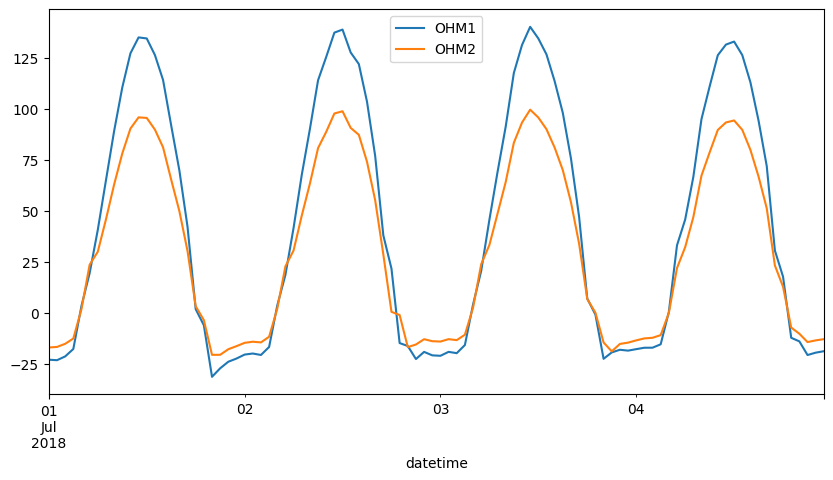

In [8]:
s = '2018-07-01'
e = '2018-07-04'

grid = 11
var = 'QS'

a = df_output_ohm1.SUEWS.loc[grid]
b = df_output_ohm2.SUEWS.loc[grid]

c = a-b

ax = a.loc[s:e, var].plot(figsize = (10,5))
b.loc[s:e, var].plot(ax = ax)
ax.legend(['OHM1', 'OHM2'])


In [ ]:
df_state_init.loc[7,['dz_wall','k_wall','cp_wall']]

var      ind_dim
dz_wall  (0, 0)          0.151
         (0, 1)         -9.000
         (0, 2)         -9.000
         (0, 3)         -9.000
         (0, 4)         -9.000
k_wall   (0, 0)          0.160
         (0, 1)         -9.000
         (0, 2)         -9.000
         (0, 3)         -9.000
         (0, 4)         -9.000
cp_wall  (0, 0)     883523.179
         (0, 1)         -9.000
         (0, 2)         -9.000
         (0, 3)         -9.000
         (0, 4)         -9.000
Name: 7, dtype: float64

In [ ]:
df_state_init.loc[7,['dz_roof','k_roof','cp_roof']]

var      ind_dim
dz_roof  (0, 0)           0.109
         (0, 1)           0.030
         (0, 2)          -9.000
         (0, 3)          -9.000
         (0, 4)          -9.000
k_roof   (0, 0)           0.246
         (0, 1)           0.025
         (0, 2)          -9.000
         (0, 3)          -9.000
         (0, 4)          -9.000
cp_roof  (0, 0)     1125045.872
         (0, 1)        1231.125
         (0, 2)          -9.000
         (0, 3)          -9.000
         (0, 4)          -9.000
Name: 7, dtype: float64

In [7]:
yaml_all = 'C:/GitHub/SUEWS_DB_Typology_test/code/tnall.yml'
config = sp.data_model.init_config_from_yaml(yaml_all)
df_state_init_tn = config.to_df_state()

# grid = df_state_init_tn.index[0]
# df_forcing = sp.load_forcing_grid(yaml_all, grid, df_state_init=df_state_init_tn)
# df_forcing[df_forcing['U'] < 0.5] = 0.5 

In [12]:
config

met_path = str(config.model.control.forcing_file)
df_forcing = sp._load.load_SUEWS_Forcing_met_df_yaml(met_path)


In [36]:
df_output_ohm2.DailyState.loc[11, ['a1', 'a2','a3']].iloc[-1]

var
a1     0.153289
a2     0.337785
a3   -12.451470
Name: 2012-07-31 23:55:00, dtype: float64

In [113]:
yaml_ward = 'C:/GitHub/SUEWS_DB_Typology_test/code/ward_all.yml'
config = sp.data_model.init_config_from_yaml(yaml_ward)
df_state_init_ward = config.to_df_state()

grid = df_state_init_ward.index[0]
df_forcing_w = sp.load_forcing_grid(yaml_ward, grid, df_state_init=df_state_init_ward)
df_forcing_w[df_forcing_w['U'] < 0.5] = 0.5 

In [ ]:
yaml_all = 'C:/GitHub/SUEWS_DB_Typology_test/code/fa.yml'
config = sp.data_model.init_config_from_yaml(yaml_all)
df_state_init = config.to_df_state()

In [133]:
yaml_all = 'C:/GitHub/SUEWS_DB_Typology_test/code/mcall.yml'
config = sp.data_model.init_config_from_yaml(yaml_all)
df_state_init_mc = config.to_df_state()

In [5]:
df_state_init, df_forcing = sp.load_sample_data()

2025-06-02 12:25:48,437 - SuPy - INFO - Loading config from yaml


In [26]:
df_state_init['storageheatmethod'] = 6

In [27]:
df_output, df_state_final = sp.run_supy(df_forcing,df_state_init)

2025-06-02 12:32:18,113 - SuPy - INFO - ====================
2025-06-02 12:32:18,128 - SuPy - INFO - SUEWS version: 2025.6.2.dev
2025-06-02 12:32:18,128 - SuPy - INFO - Simulation period:
2025-06-02 12:32:18,128 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2025-06-02 12:32:18,128 - SuPy - INFO -   End: 2013-01-01 00:00:00
2025-06-02 12:32:18,128 - SuPy - INFO - 
2025-06-02 12:32:18,128 - SuPy - INFO - No. of grids: 1
2025-06-02 12:32:18,128 - SuPy - INFO - SUEWS is running in serial mode
2025-06-02 12:32:43,096 - SuPy - INFO - Execution time: 25.0 s
2025-06-02 12:32:43,096 - SuPy - INFO - ====================



In [28]:
# df_s_1 = df_output.SUEWS.loc[1]
df_s = df_output.SUEWS.loc[1]

<Axes: xlabel='datetime'>

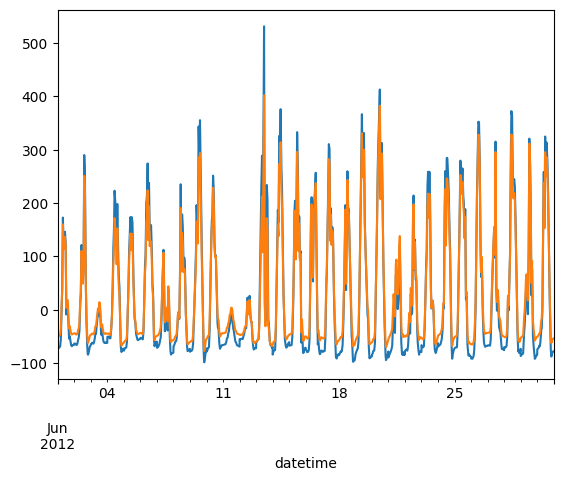

In [29]:
df_s.loc['2012-06','QS'].plot()
df_s_1.loc['2012-06','QS'].plot()


In [32]:
df_output.DailyState.loc[1, ['a1', 'a2','a3']].iloc[-1]

var
a1   NaN
a2   NaN
a3   NaN
Name: 2013-01-01 00:00:00, dtype: float64

In [153]:
# df_output_w, df_final_state_w = sp.run_supy(df_forcing,df_state_init_ward.loc[[8,11]])
#df_output_w, df_final_state_w = sp.run_supy(df_forcing.loc['2018-07'] ,df_state_init_ward.loc[[11]])
df_output_mc, df_final_state_mc = sp.run_supy(df_forcing_w.loc['2012-02'] ,df_state_init_mc.loc[[11]])


2025-04-28 15:34:26,390 - SuPy - INFO - ====================
2025-04-28 15:34:26,391 - SuPy - INFO - Simulation period:
2025-04-28 15:34:26,392 - SuPy - INFO -   Start: 2012-02-01 00:00:00
2025-04-28 15:34:26,393 - SuPy - INFO -   End: 2012-02-29 23:55:00
2025-04-28 15:34:26,394 - SuPy - INFO - 
2025-04-28 15:34:26,395 - SuPy - INFO - No. of grids: 1
2025-04-28 15:34:26,396 - SuPy - INFO - SuPy is running in serial mode
2025-04-28 15:34:28,597 - SuPy - INFO - Execution time: 2.2 s
2025-04-28 15:34:28,597 - SuPy - INFO - ====================



In [35]:
df_output.DailyState.loc[1, ['a1', 'a2','a3']]

var,a1,a2,a3
datetime,,,
2012-01-01 00:05:00,NaN,NaN,NaN
2012-01-01 00:10:00,NaN,NaN,NaN
2012-01-01 00:15:00,NaN,NaN,NaN
2012-01-01 00:20:00,NaN,NaN,NaN
2012-01-01 00:25:00,NaN,NaN,NaN
...,...,...,...
2012-12-31 23:40:00,NaN,NaN,NaN
2012-12-31 23:45:00,NaN,NaN,NaN
2012-12-31 23:50:00,NaN,NaN,NaN


In [ ]:
df_output_agg, df_final_state_agg = sp.run_supy(df_forcing.loc['2012-07'] ,df_state_init_ward.loc[[11]])

var
HDD1_h              0.000000
HDD2_c              0.000000
HDD3_Tmean               NaN
HDD4_T5d                 NaN
P_day               4.200000
DaysSR              0.000000
GDD_EveTr         300.000000
GDD_DecTr         300.000000
GDD_Grass         300.000000
SDD_EveTr           0.000000
SDD_DecTr           0.000000
SDD_Grass           0.000000
Tmin               15.520000
Tmax               15.520000
DLHrs              14.083333
LAI_EveTr           5.100000
LAI_DecTr           5.500000
LAI_Grass           5.900000
DecidCap            0.800000
Porosity            0.100000
AlbEveTr            0.100000
AlbDecTr            0.180000
AlbGrass            0.210000
WU_EveTr1           0.000000
WU_EveTr2           0.000000
WU_EveTr3           0.000000
WU_DecTr1           0.000000
WU_DecTr2           0.000000
WU_DecTr3           0.000000
WU_Grass1           0.000000
WU_Grass2           0.000000
WU_Grass3           0.000000
LAIlumps            1.000000
AlbSnow             0.000000
DensSnow_P

In [85]:
df_output_agg, df_final_state_agg = sp.run_supy(df_forcing.loc['2017-01':'2018-08'] ,df_state_init.loc[[11]])

2025-04-28 14:33:12,342 - SuPy - INFO - ====================


2025-04-28 14:33:12,344 - SuPy - INFO - Simulation period:
2025-04-28 14:33:12,344 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-04-28 14:33:12,347 - SuPy - INFO -   End: 2018-08-31 23:55:00
2025-04-28 14:33:12,348 - SuPy - INFO - 
2025-04-28 14:33:12,349 - SuPy - INFO - No. of grids: 1
2025-04-28 14:33:12,349 - SuPy - INFO - SuPy is running in serial mode
2025-04-28 14:34:06,646 - SuPy - INFO - Execution time: 54.3 s
2025-04-28 14:34:06,646 - SuPy - INFO - ====================



In [86]:
df_output_tn, df_final_state_tn = sp.run_supy(df_forcing.loc['2017-01':'2018-08'] ,df_state_init_tn.loc[[11]])

2025-04-28 14:34:06,752 - SuPy - INFO - ====================
2025-04-28 14:34:06,753 - SuPy - INFO - Simulation period:
2025-04-28 14:34:06,754 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-04-28 14:34:06,755 - SuPy - INFO -   End: 2018-08-31 23:55:00
2025-04-28 14:34:06,755 - SuPy - INFO - 
2025-04-28 14:34:06,756 - SuPy - INFO - No. of grids: 1
2025-04-28 14:34:06,757 - SuPy - INFO - SuPy is running in serial mode
2025-04-28 14:34:59,462 - SuPy - INFO - Execution time: 52.7 s
2025-04-28 14:34:59,462 - SuPy - INFO - ====================



In [92]:
df_output_w, df_final_state_w = sp.run_supy(df_forcing.loc['2017-01':'2018-08'] ,df_state_init_ward.loc[[11]])

2025-04-28 14:57:34,487 - SuPy - INFO - ====================
2025-04-28 14:57:34,487 - SuPy - INFO - Simulation period:
2025-04-28 14:57:34,487 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-04-28 14:57:34,487 - SuPy - INFO -   End: 2018-08-31 23:55:00
2025-04-28 14:57:34,487 - SuPy - INFO - 
2025-04-28 14:57:34,496 - SuPy - INFO - No. of grids: 1
2025-04-28 14:57:34,497 - SuPy - INFO - SuPy is running in serial mode
2025-04-28 14:58:25,670 - SuPy - INFO - Execution time: 51.2 s
2025-04-28 14:58:25,670 - SuPy - INFO - ====================



In [75]:
df_outputtn.DailyState.loc[11,['a1','a2','a3']].iloc[-1]

var
a1     0.399269
a2     0.178625
a3   -20.933670
Name: 2012-07-31 23:55:00, dtype: float64

In [76]:
df_output.DailyState.loc[11,['a1','a2','a3']].iloc[-1]

var
a1     0.205358
a2     0.444863
a3   -14.559659
Name: 2012-07-31 23:55:00, dtype: float64

In [77]:
df_output_w.DailyState.loc[11,['a1','a2','a3']].iloc[-1]

var
a1    0.459719
a2    0.208035
a3    8.177670
Name: 2012-07-31 23:55:00, dtype: float64

In [53]:
df_output_w.SUEWS

var                       Kdown      Kup       Ldown         Lup     Tsurf  \
grid datetime                                                                
1    2018-05-01 00:00:00    0.0  0.00000  326.523758  347.355801  6.900000   
     2018-05-01 00:05:00    0.0  0.00000  326.734725  347.447182  6.916667   
     2018-05-01 00:10:00    0.0  0.00000  326.945846  347.538586  6.933333   
     2018-05-01 00:15:00    0.0  0.00000  327.157121  347.630014  6.950000   
     2018-05-01 00:20:00    0.0  0.00000  327.368551  347.721466  6.966667   
...                         ...      ...         ...         ...       ...   
     2018-07-31 23:35:00    0.5  0.05625  212.023411  311.126680  0.508172   
     2018-07-31 23:40:00    0.5  0.05625  212.023411  311.126680  0.508172   
     2018-07-31 23:45:00    0.5  0.05625  212.023411  311.126680  0.508172   
     2018-07-31 23:50:00    0.5  0.05625  212.023411  311.126680  0.508172   
     2018-07-31 23:55:00    0.5  0.05625  212.023411  311.126680  0.508172   

var                              QN         QF         QS  QH  QE  ...  \
grid datetime                                                      ...   
1    2018-05-01 00:00:00 -20.832043  68.862668        NaN NaN NaN  ...   
     2018-05-01 00:05:00 -20.712457  67.796936 -31.004284 NaN NaN  ...   
     2018-05-01 00:10:00 -20.592740  66.731205 -30.879143 NaN NaN  ...   
     2018-05-01 00:15:00 -20.472892  65.665473 -30.757180 NaN NaN  ...   
     2018-05-01 00:20:00 -20.352915  64.599741 -30.638264 NaN NaN  ...   
...                             ...        ...        ...  ..  ..  ...   
     2018-07-31 23:35:00 -98.659520  45.868663 -39.274549 NaN NaN  ...   
     2018-07-31 23:40:00 -98.659520  45.868663 -39.727579 NaN NaN  ...   
     2018-07-31 23:45:00 -98.659520  45.868663 -40.118585 NaN NaN  ...   
     2018-07-31 23:50:00 -98.659520  45.868663 -40.453746 NaN NaN  ...   
     2018-07-31 23:55:00 -98.659520  45.868663 -40.738686 NaN NaN  ...   

var                       MeltWater  MeltWStore  SnowCh  SnowRPaved  \
grid datetime                                                         
1    2018-05-01 00:00:00        0.0         0.0     0.0         0.0   
     2018-05-01 00:05:00        0.0         0.0     0.0         0.0   
     2018-05-01 00:10:00        0.0         0.0     0.0         0.0   
     2018-05-01 00:15:00        0.0         0.0     0.0         0.0   
     2018-05-01 00:20:00        0.0         0.0     0.0         0.0   
...                             ...         ...     ...         ...   
     2018-07-31 23:35:00        0.0         0.0     0.0         0.0   
     2018-07-31 23:40:00        0.0         0.0     0.0         0.0   
     2018-07-31 23:45:00        0.0         0.0     0.0         0.0   
     2018-07-31 23:50:00        0.0         0.0     0.0         0.0   
     2018-07-31 23:55:00        0.0         0.0     0.0         0.0   

var                       SnowRBldgs  Ts  T2  Q2       U10  RH2  
grid datetime                                                    
1    2018-05-01 00:00:00         0.0 NaN NaN NaN  1.041392  NaN  
     2018-05-01 00:05:00         0.0 NaN NaN NaN  0.360286  NaN  
     2018-05-01 00:10:00         0.0 NaN NaN NaN  0.359987  NaN  
     2018-05-01 00:15:00         0.0 NaN NaN NaN  0.360223  NaN  
     2018-05-01 00:20:00         0.0 NaN NaN NaN  0.361764  NaN  
...                              ...  ..  ..  ..       ...  ...  
     2018-07-31 23:35:00         0.0 NaN NaN NaN  0.001276  NaN  
     2018-07-31 23:40:00         0.0 NaN NaN NaN  0.001276  NaN  
     2018-07-31 23:45:00         0.0 NaN NaN NaN  0.001276  NaN  
     2018-07-31 23:50:00         0.0 NaN NaN NaN  0.001276  NaN  
     2018-07-31 23:55:00         0.0 NaN NaN NaN  0.001276  NaN  

[26496 rows x 82 columns]

<Axes: xlabel='datetime'>

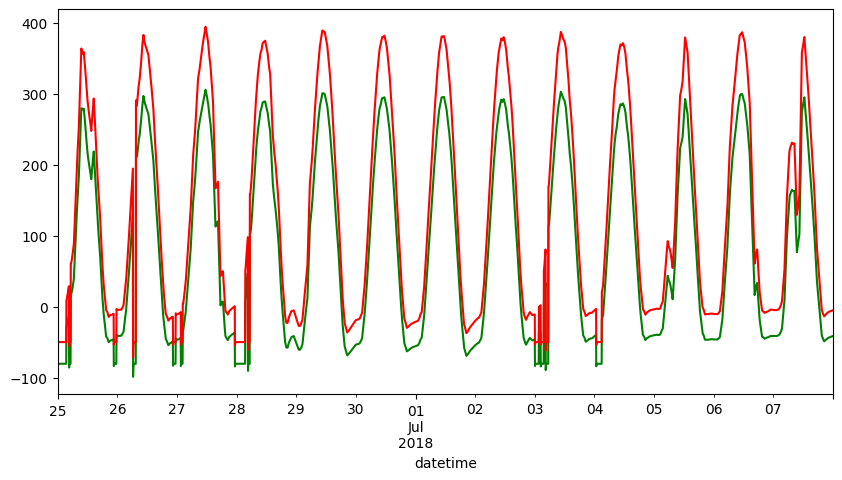

In [111]:
var = 'QS'

s = '2018-06-25'
e = '2018-07-07'

# df_output_agg.SUEWS.loc[11].loc[s :e, var].plot(figsize = (10,5))
df_output_tn.SUEWS.loc[11].loc[s :e, var].plot(figsize = (10,5), color = 'green')
df_output_w.SUEWS.loc[11].loc[s :e, var].plot(figsize = (10,5), color = 'red')

<Axes: xlabel='datetime'>

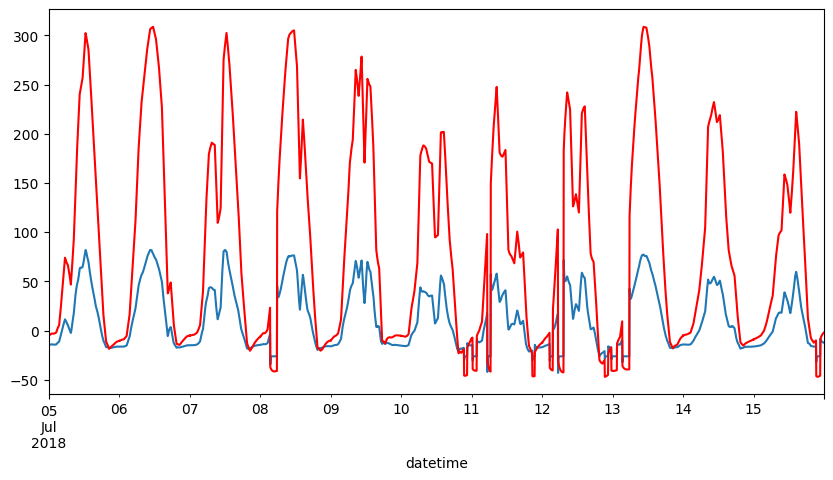

In [85]:
df_output.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5))
df_output_w.SUEWS.loc[1].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5), color = 'red')

<Axes: xlabel='datetime'>

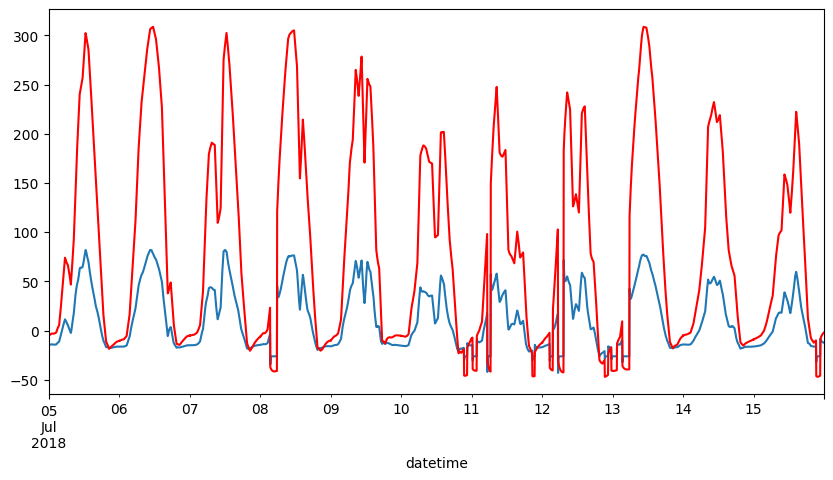

In [ ]:
df_output.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5))
df_output_w.SUEWS.loc[1].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5), color = 'red')

<Axes: xlabel='datetime'>

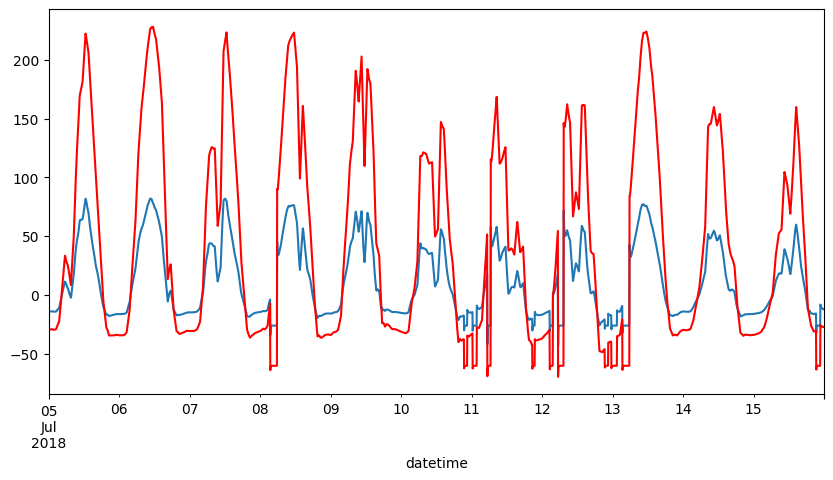

In [17]:
df_output.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5))
df_output_w.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QS'].plot(figsize = (10,5), color = 'red')

KeyError: 11

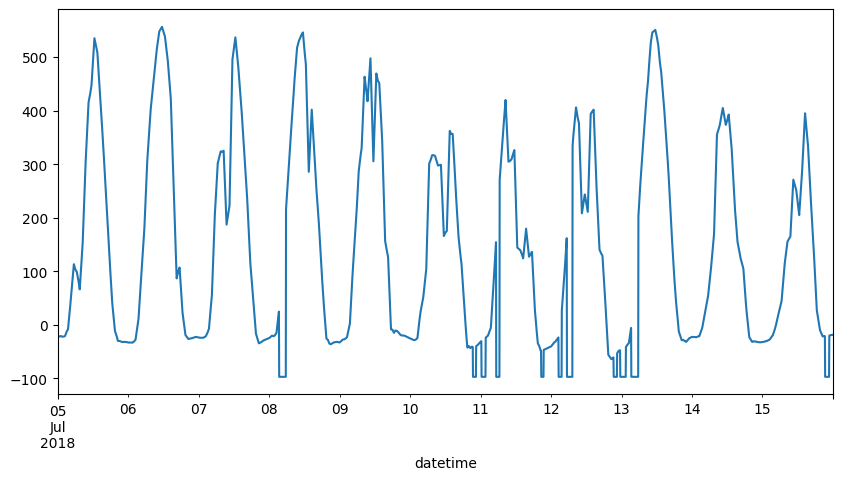

In [86]:


df_output.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QN'].plot(figsize = (10,5))
df_output_w.SUEWS.loc[11].loc['2018-07-05' :'2018-07-15', 'QN'].plot(figsize = (10,5), color = 'red')

In [90]:
a = df_output_w.SUEWS

a.loc[1,'a1']

KeyError: 'a1'

In [98]:
df_output.DailyState.loc[11,['a1','a2','a3']]

var,a1,a2,a3
datetime,,,
2018-05-01 00:00:00,NaN,NaN,NaN
2018-05-01 00:05:00,NaN,NaN,NaN
2018-05-01 00:10:00,NaN,NaN,NaN
2018-05-01 00:15:00,NaN,NaN,NaN
2018-05-01 00:20:00,NaN,NaN,NaN
...,...,...,...
2018-07-31 23:35:00,NaN,NaN,NaN
2018-07-31 23:40:00,NaN,NaN,NaN
2018-07-31 23:45:00,NaN,NaN,NaN


In [94]:
df_output_w.DailyState.loc[1,['a1','a2','a3']]

var,a1,a2,a3
datetime,,,
2018-05-01 00:00:00,NaN,NaN,NaN
2018-05-01 00:05:00,NaN,NaN,NaN
2018-05-01 00:10:00,NaN,NaN,NaN
2018-05-01 00:15:00,NaN,NaN,NaN
2018-05-01 00:20:00,NaN,NaN,NaN
...,...,...,...
2018-07-31 23:35:00,NaN,NaN,NaN
2018-07-31 23:40:00,NaN,NaN,NaN
2018-07-31 23:45:00,NaN,NaN,NaN
